In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
PATH_TO_RESULTS = "../data/agent_training_history.json"

In [48]:
with open(PATH_TO_RESULTS, "r") as config_file:
    game_results = json.load(config_file)

In [49]:
results = [game["Result"] for game in game_results]
reward_per_game = [(game["Reward"]) + 5 if result == 0 else (game["Reward"]) - 5 for game, result in zip(game_results, results)]
losses = [(game["Loss"]) for game, result in zip(game_results, results)]
actions_per_game = [sum(game["ActionDistribution"]) for game in game_results]

avg_reward_per_action = [reward / (action+1e-16) for action, reward in zip(actions_per_game, reward_per_game)]


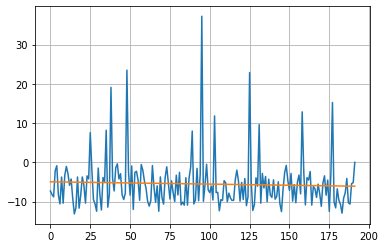

In [50]:
x = np.array([x for x in range(len(reward_per_game))])
y = reward_per_game
a, b = np.polyfit(x, y, 1)
plt.plot(y)
plt.grid()
# plt.plot(x, y, s=4)
plt.plot(x, a*x+b)
# plt.ylim(-6, 0)

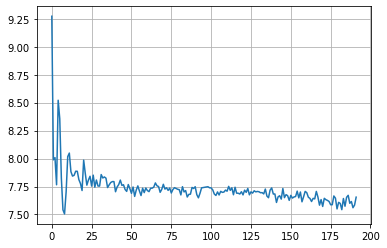

In [51]:
x = np.array([x for x in range(len(losses))])
y = losses
plt.grid()
plt.plot(losses)

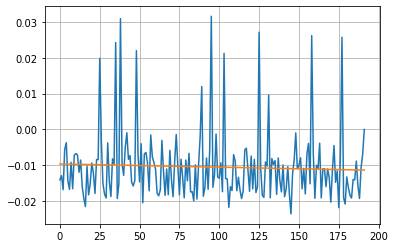

In [52]:
x = np.array([x for x in range(len(avg_reward_per_action))])
y = avg_reward_per_action
a, b = np.polyfit(x, y, 1)

plt.grid()
plt.plot(y)
# plt.scatter(x, y, s=4)
plt.plot(x, a*x+b)

In [53]:
win_rate = [(len([res for res in results[:i] if res == 2]) / (len(results[:i]) + 0.000000000000000001)) for i in range(len(results))]

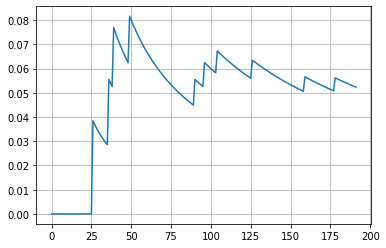

In [54]:
plt.grid()
plt.plot(win_rate)

In [55]:
actions = [0,0,0,0,0]
sum_actions = []
for game in game_results:
    action_dist = game["ActionDistribution"]
    sum_actions.append(sum(action_dist))
    for i, num_actions in enumerate(action_dist):
        actions[i] += num_actions

<BarContainer object of 5 artists>

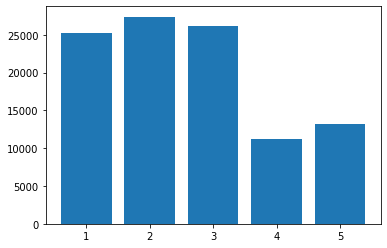

In [56]:
plt.bar([1,2,3,4,5], actions)

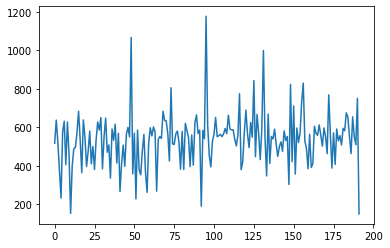

In [57]:
plt.plot(sum_actions)